In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score,precision_recall_fscore_support,classification_report
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from nltk import pos_tag, word_tokenize

%matplotlib inline


%matplotlib inline
import numpy as np
import pandas as pd 
import scipy as sp
import sklearn as sk # data mining tools
import warnings
from sklearn.preprocessing import OneHotEncoder
import time
warnings.filterwarnings("ignore")

In [2]:
wine_base = pd.read_csv("Our_dataset/dataAfterPOS.csv", index_col=0)
wine_base = wine_base.reset_index()
wine_base= wine_base[pd.notnull(wine_base['description'])]
wine_base= wine_base.drop(['designation','region_2','title','province','variety','winery','region_1'], axis=1)



In [3]:
#to make the wordcloud for one country
#wine_base = wine_base[wine_base['country']=='Spain']

In [4]:
wine_base = wine_base[pd.notnull(wine_base['country'])]
wine_base = wine_base[pd.notnull(wine_base['taster_name'])]
wine_base = wine_base.dropna()

In [5]:
def OneHotEncode(dataframe,column_to_encode,take_whole_dataset=True):
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(dataframe[[column_to_encode]])
    mapping = {}
    i=0
    for elem in enc.categories_[0]:
        mapping[elem]=i
        i+=1
    resu = enc.transform(dataframe[[column_to_encode]]).toarray()
    if take_whole_dataset:
        for elem in mapping:
            dataframe[elem]=resu[:,mapping[elem]]
        return dataframe
    else:
        subset = dataframe[[column_to_encode]]
        for elem in mapping:
            subset[elem]=resu[:,mapping[elem]]
        return subset
        

In [6]:
wine_base = OneHotEncode(wine_base,'country')
wine_base = wine_base.drop('country', 1)
wine_base = OneHotEncode(wine_base,'taster_name')
wine_base = wine_base.drop('taster_name', 1)

In [7]:
wine_base.head(2)

,description,points,price,word_count,Argentina,Australia,Austria,Chile,France,Germany,...,Kerin O’Keefe,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone,unknown
0,aromas tropical fruit broom brimstone herb pal...,87,17.0,24,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ripe fruity wine firm tannins juicy red berry ...,87,15.0,39,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# CONTROL PANEL

In [8]:
X = wine_base.drop(['points'], axis=1)
Y = wine_base['points'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [9]:
#classification or regressor?
classificat = False

#select only CountVectorizer_data or TfidfVectorizer_data o none, but NOT the two togheder
CountVectorizer_data=True
TfidfVectorizer_data=False

#here select the actibute that you want to use during the training
#features=['price','taster_name','word_count']
#features= list(X_train)[1:]
features=[]

In [10]:
#for the trivia words
#min_df_c=200    # default=1
#max_df_c=0.99 #default=1.0

#for the ingisht
min_df_c=3   # default=1
max_df_c=26 #default=1.0

if(CountVectorizer_data |TfidfVectorizer_data ):
    
    if(CountVectorizer_data):
        vect = CountVectorizer(min_df=min_df_c,max_df=max_df_c)
        vect.fit(X_train['description'])
        print("vocabulary size c : {}".format(len(vect.vocabulary_)))
        X_train_vectored_cv = vect.transform(X_train['description'])
        X_train_final = X_train_vectored_cv
    else:
        vect = TfidfVectorizer(smooth_idf=True, sublinear_tf=False, analyzer='word')
        vect.fit(X_train['description'])
        print("vocabulary size tf: {}".format(len(vect.vocabulary_)))
        X_train_vectored_tfidf = vect.transform(X_train['description'])
        X_train_final = X_train_vectored_tfidf
        
    for feature in features:
        X_train_final = hstack((X_train_final,np.array(X_train[feature])[:,None]))
else:
    
    X_train_final = X_train.loc[:,features]
       

vocabulary size c : 8042


# Training error Test error for regression

In [11]:
#lr = LinearRegression()
lr = Ridge()
#lr = Lasso()
#lr = SGDRegressor(max_iter=1000, tol=1e-3)
#lr = DecisionTreeRegressor(max_depth=40)
lr.fit(X_train_final, y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
from sklearn.linear_model import LogisticRegression, LinearRegression,Ridge,Lasso,SGDRegressor


In [13]:
y_train_pred = lr.predict(X_train_final)
if(classificat):
    print(classification_report(y_train, y_train_pred, target_names=labels))
else:
    mse = mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(mse)
    print("on train")
    print(rmse)
if(CountVectorizer_data | TfidfVectorizer_data ):
    X_test_final = vect.transform(X_test['description'])
    for feature in features:
        X_test_final = hstack((X_test_final,np.array(X_test[feature])[:,None]))
else:
    X_test_final = X_test.loc[:,features]

y_test_pred = lr.predict(X_test_final)
if(classificat):
    print(classification_report(y_test, y_test_pred, target_names=labels))

else:
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    print("on test")
    print(rmse)

on train
2.711765224204666
on test
2.89049113123599


In [14]:
coeff = lr.coef_
coeff = np.absolute(coeff)
sorted_coef_index = coeff.argsort()


In [15]:
# Sort the coefficients from the model (only work for sparse matrix in their own)
sorted_coef_index = lr.coef_.argsort()
feature_names = np.array(vect.get_feature_names())

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:50]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-50:-1]]))

Smallest Coefs:
['gluey' 'rotten' 'uninspiring' 'skunky' 'uninspired' 'ammonia' 'unclean'
 'disagreeable' 'thinned' 'bizarre' 'feeble' 'brotherhood' 'unremarkable'
 'sauerkraut' 'semisour' 'wilted' 'passable' 'plaster' 'worst' 'mars'
 'ashtray' 'stale' 'midland' 'mucky' 'vinegary' 'guests' 'dirty' 'subpar'
 'globular' 'weediness' 'weakly' 'greenwood' 'sell' 'chlorophyll'
 'underdeveloped' 'torrontes' 'spoons' 'blandness' 'sends' 'shearing'
 'indistinct' 'fake' 'spineless' 'victim' 'deficient' 'lifeless' 'mess'
 'maderized' 'discordant' 'overpriced']

Largest Coefs: 
['cayuse' 'masseto' 'ornellaia' 'paean' 'gaja' 'ultrafine' 'majestic'
 'breathtaking' 'grange' 'runrig' 'vaca' 'superbly' 'multifaceted'
 'stupendous' 'grandest' 'ace' 'charts' 'figeac' 'masterpiece' 'piña'
 'vittorio' 'pirouette' 'torrid' 'roederer' 'unleashing' 'trie'
 'disarming' 'ultrarefined' 'uncompromising' 'triumph' 'stylishness'
 'gramercy' 'riservas' 'cristiano' 'cvne' 'shu' 'perfection' 'underlayer'
 'mesnil' 'ex

In [16]:
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
a = feature_names[sorted_coef_index[-1:-50:-1]]
b = lr.coef_[sorted_coef_index[-1:-50:-1]]
print(a)
print(b)

['cayuse' 'masseto' 'ornellaia' 'paean' 'gaja' 'ultrafine' 'majestic'
 'breathtaking' 'grange' 'runrig' 'vaca' 'superbly' 'multifaceted'
 'stupendous' 'grandest' 'ace' 'charts' 'figeac' 'masterpiece' 'piña'
 'vittorio' 'pirouette' 'torrid' 'roederer' 'unleashing' 'trie'
 'disarming' 'ultrarefined' 'uncompromising' 'triumph' 'stylishness'
 'gramercy' 'riservas' 'cristiano' 'cvne' 'shu' 'perfection' 'underlayer'
 'mesnil' 'explosions' 'kite' 'bougros' 'mesmerizing' 'pinnacle' 'vougeot'
 'grandiose' 'rancio' 'cristal' 'chanson']
[5.80509095 5.55972361 5.18575311 5.15857787 5.00158344 4.75728887
 4.68852664 4.67500598 4.64876796 4.60896765 4.606434   4.55482019
 4.54692784 4.53448077 4.52417587 4.37476199 4.36956781 4.35229598
 4.33026025 4.31872535 4.27914278 4.26530485 4.26432672 4.2379147
 4.23768248 4.21857698 4.21232965 4.19373989 4.16126842 4.14051931
 4.11844727 4.11580874 4.09453099 4.08204649 4.06304189 4.05296222
 4.04770249 4.03166412 4.0021506  4.00105019 3.98470538 3.96555039


In [18]:
d={}
for i in range (0,len(a)):
    d[a[i]]=b[i]
    

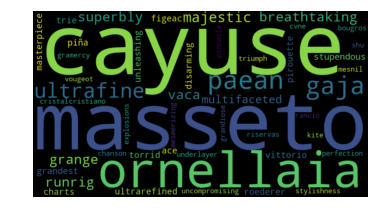

In [19]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [21]:
def toWordCloud(dictionary,image_path=None,colormap='viridis'):
    if(image_path==None): 
        wc = WordCloud(background_color="white",colormap=colormap,width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False #mask=transformed_wine_mask
        , contour_width=3, contour_color='firebrick')
        wc.generate_from_frequencies(dictionary)

        wc.to_file("output.png")

        plt.figure(figsize=[10,10])
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        #mask = np.array(Image.open(image_path))
        alice_mask = np.array(Image.open(path.join(image_path)))

        #transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
        #for i in range(len(mask)):
        #    transformed_mask[i] = list(map(transform_format, wine_mask[i]))

        wc = WordCloud(background_color="white",colormap=colormap,width=900,height=500,
        max_words=1628,relative_scaling=1,normalize_plurals=False,
        mask=alice_mask)
        wc.generate_from_frequencies(dictionary)

        wc.to_file("output.png")

        plt.figure(figsize=[10,8])
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.show()

In [22]:
image_path= "circle3.png"

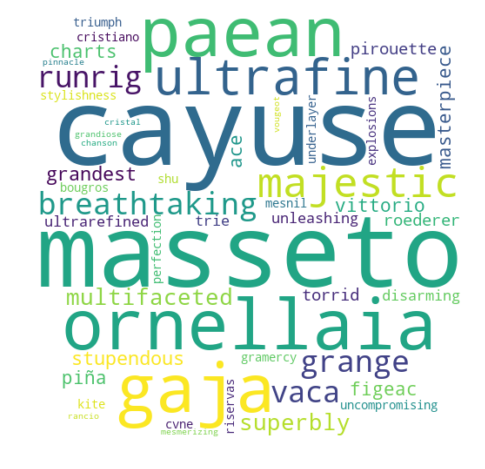

In [23]:
toWordCloud(d,image_path=image_path)